# Assignment 3 
# Student: Rishik Adhikari
# Student #: 1008214905

In [1]:
#base Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import q1
%matplotlib inline

# Question 1

In [2]:
#x,y values for complex number: c = x + yi
x = np.linspace(-2.,2.,1000)
y = np.linspace(-2.,2.,1000)

bound = np.sqrt(2**2 + 2**2) #boundary of the complex number z. 

#Arrays to store values of convergent and divergent points, separating both real and imaginary for both cases.
conv_points_real = list()
conv_points_imag = list()
div_points_real = list()
div_points_imag = list()


i_list = [] #a list to store iteration of divergent points. 

#Below: q1.iterate is the main function and returns expected arrays of values.
cr,ci,dr,di = q1.iterate(10,conv_points_real,conv_points_imag,div_points_real,div_points_imag,i_list,x,y,bound)
#cr -> convergent real, ci->convergent imaginary, dr->divergent real, di->divergent imaginary


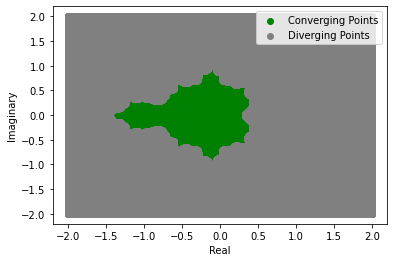

In [10]:

#Plots of Convergent and Divergent Points in a complex plane.
plt.scatter(cr,ci,color="green", label="Converging Points")
plt.scatter(dr,di,color="gray",label="Diverging Points")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(loc='upper right')
plt.savefig("q1_1.png")
plt.show()

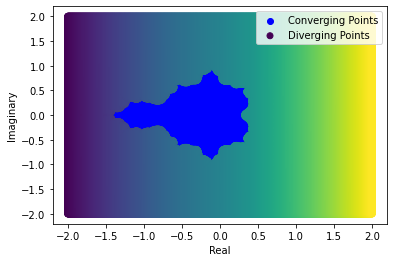

In [11]:
#Plot of Convergent and Divergent Points in a complex plane with gradient like color effect for divergent points using iteration.
plt.scatter(cr,ci,c="blue",label="Converging Points")
plt.scatter(dr,di,c=i_list,label="Diverging Points")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(loc='upper right')
plt.savefig("q1_2.png")
plt.show()

# End of Question 1.

#  Question 2

In [5]:

def diff(init_value, t, sigma, r, b):
	""" This function prepares equations for the derivatives of x,y,z and returns them. 

		Inputs:
		init_value -> list of initial values of x,y,z.
		t -> array of time
		sigma, r, b, -> given constants

		Output: Derivative of X, Y, Z with respect to time. 


		"""
	x,y,z = init_value

	dxdt = -sigma*(x - y)
	dydt = (r*x) - y - (x*z)
	dzdt = -(b*z) + (x*y)

	return dxdt, dydt, dzdt


#Initial Integration using ODEINT

#Below Values are given to us. 
w = [0,1,0] 
sigma = 10
r = 28
b = 8/3

#time array. 
t = np.arange(0,60,0.01)
t = np.append(t,60)

#Solving the differential equations given by diff function above using odeint from scipy library with above given and calculated values. 
solutions = odeint(diff, w, t, args=(sigma,r,b))

In [6]:
del_t = 0.01 #Given in the assignment 

N = t/del_t #Given for plotting purpose.


Y_sol = solutions[:,1]*10 #Y solution returned by solving the differential equation. Separating Y for easy plotting.
Y_sol = Y_sol.astype(int) #Followed the paper. 

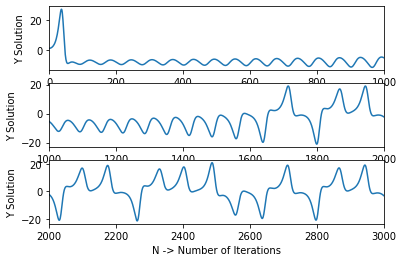

In [7]:
#Plot of Y vs N. Similar to Figure 1 of the research paper referred in the assignment. 
fig, axs = plt.subplots(3, 1)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel("N -> Number of Iterations")
axs[0].set_ylabel("Y Solution")
axs[0].plot(N[0:1000], solutions[0:1000,1])
axs[1].set_xlim(1000,2000)
axs[1].set_xlabel("N -> Number of Iterations")
axs[1].set_ylabel("Y Solution")
axs[1].plot(N[1000:2000], solutions[1000:2000,1])
axs[2].set_xlim(2000,3000)
axs[2].set_xlabel("N -> Number of Iterations")
axs[2].set_ylabel("Y Solution")
axs[2].plot(N[2000:3000], solutions[2000:3000,1])
plt.show()
fig.tight_layout()

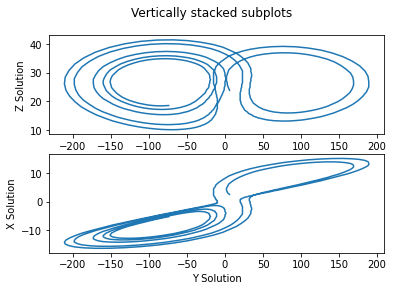

In [8]:
#Plot of Y vs Z and Y vs X. Similar to Figure 2 of the research paper referred in the assignment. 

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(Y_sol[1400:1900], solutions[1400:1900,2])
axs[0].set_xlabel("Y Solution")
axs[0].set_ylabel("Z Solution")
axs[1].plot(Y_sol[1400:1900], solutions[1400:1900,0])
axs[1].set_xlabel("Y Solution")
axs[1].set_ylabel("X Solution")
plt.show()


In [9]:
#Solving the Differential Equations again by changing the initial values.

w0 = np.array(w)

w1 = w0 + np.array([0,1.e-8,0])

w1 = list(w1)

solution2 = odeint(diff, w1, t, args=(sigma,r,b))